<a href="https://colab.research.google.com/github/medeirosgian/Data-Science/blob/main/Estudos/Classifica%C3%A7%C3%A3o/regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set style (Seaborn)
sns.set_style()

# Import dos dados
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data') #Não usar dados de Cleveland
columns = ['age', 'sex', 'cp', 'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'num']
df.columns = columns

# Substituir valores '?' em todo o DataFrame
for col in columns:
  df.loc[df[col]=='?', col] = 0.0

print("Tamanho de df: {}\n".format(df.shape))
df.tail()

Tamanho de df: (293, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
288,52,1,4,160,331,0,0,94,1,2.5,0,0,0,1
289,54,0,3,130,294,0,1,100,1,0.0,2,0,0,1
290,56,1,4,155,342,1,0,150,1,3.0,2,0,0,1
291,58,0,2,180,393,0,0,110,1,1.0,2,0,7,1
292,65,1,4,130,275,0,1,115,1,1.0,2,0,0,1


In [ ]:
# Import SciKitLearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import modelo de regressão logística
from sklearn.linear_model import LogisticRegression

# Instanciar modelo
model = LogisticRegression()

# Separar dados (dependente/independente)
x = df.drop('num', axis=1)
y = df['num']

# Dividir dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y)

# Padronização dos dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Fit do modelo
model.fit(X_train, y_train)

# Padronizar dados teste
X_test = scaler.transform(X_test)

# Predizer casos
y_pred = model.predict(X_test)

In [ ]:
 # Relatório com matriz de confusão
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.95      0.60      0.73        30

    accuracy                           0.82        74
   macro avg       0.86      0.79      0.80        74
weighted avg       0.85      0.82      0.81        74



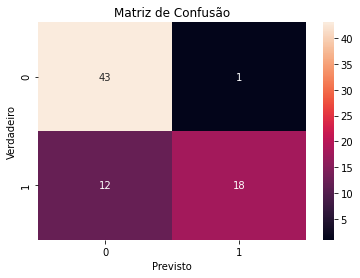

In [ ]:
# Plotar a matriz de confusão gráfica
fig, ax = plt.subplots();
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax);

# Configurando gráfico
ax.set_title('Matriz de Confusão');
ax.set_ylabel('Verdadeiro');
ax.set_xlabel('Previsto');